In [15]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.time_series_preprocessing import (
    extract_currency_series_algodao,
    rename_columns_and_set_id,
    convert_column_to_datetime,
    convert_column_to_float,
    drop_over_limit_date,
    export_to_parquet
)

from scripts.time_series_visualization import (
    plot_raw_series,
    plot_series_acf,
    plot_series_pacf,
    checks_stationarity
)

In [16]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [17]:
df_algodao = pd.read_csv("../data/raw/algodao/Indicador do Algodão em Pluma CEPEA-ESALQ - Prazo de 8 dias.csv")

In [18]:
df_algodao.head(10)

,Data,Prazo de 8 dias R$,Prazo de 8 dias US$
0,28/06/1996,"81,19","80,86"
1,01/07/1996,"80,93","80,6"
2,02/07/1996,"80,93","80,53"
3,03/07/1996,"80,79","80,4"
4,04/07/1996,"80,7","80,35"
5,05/07/1996,"80,59","80,26"
6,08/07/1996,"80,6","80,27"
7,09/07/1996,"80,13","79,72"
8,10/07/1996,"79,89","79,47"
9,11/07/1996,"79,72","79,32"


In [19]:
df_algodao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Data                 7188 non-null   object
 1   Prazo de 8 dias R$   7188 non-null   object
 2   Prazo de 8 dias US$  7188 non-null   object
dtypes: object(3)
memory usage: 168.6+ KB


In [20]:
df_algodao_brl = extract_currency_series_algodao(df_algodao)
df_algodao_brl.head()

,Data,Prazo de 8 dias R$
0,28/06/1996,"81,19"
1,01/07/1996,"80,93"
2,02/07/1996,"80,93"
3,03/07/1996,"80,79"
4,04/07/1996,"80,7"


In [21]:
cols_dict_brl = {
    'Data': 'ds',
    'Prazo de 8 dias R$': 'y'
}

df_algodao_brl = rename_columns_and_set_id(df_algodao_brl, cols_dict_brl, "ALGODAO")
df_algodao_brl = convert_column_to_datetime(df_algodao_brl, "ds")
df_algodao_brl = convert_column_to_float(df_algodao_brl, "y")

df_algodao_brl.head()

,ds,y,unique_id
0,1996-06-28,81.19,ALGODAO
1,1996-07-01,80.93,ALGODAO
2,1996-07-02,80.93,ALGODAO
3,1996-07-03,80.79,ALGODAO
4,1996-07-04,80.70,ALGODAO


In [22]:
df_algodao_brl.tail()

,ds,y,unique_id
7183,2025-04-30,438.71,ALGODAO
7184,2025-05-02,441.90,ALGODAO
7185,2025-05-05,436.60,ALGODAO
7186,2025-05-06,438.31,ALGODAO
7187,2025-05-07,439.96,ALGODAO


In [23]:
df_algodao_brl = drop_over_limit_date(df_algodao_brl, '01/05/2025', "ds")
df_algodao_brl.tail()

,ds,y,unique_id
7179,2025-04-24,433.75,ALGODAO
7180,2025-04-25,434.22,ALGODAO
7181,2025-04-28,433.14,ALGODAO
7182,2025-04-29,438.10,ALGODAO
7183,2025-04-30,438.71,ALGODAO


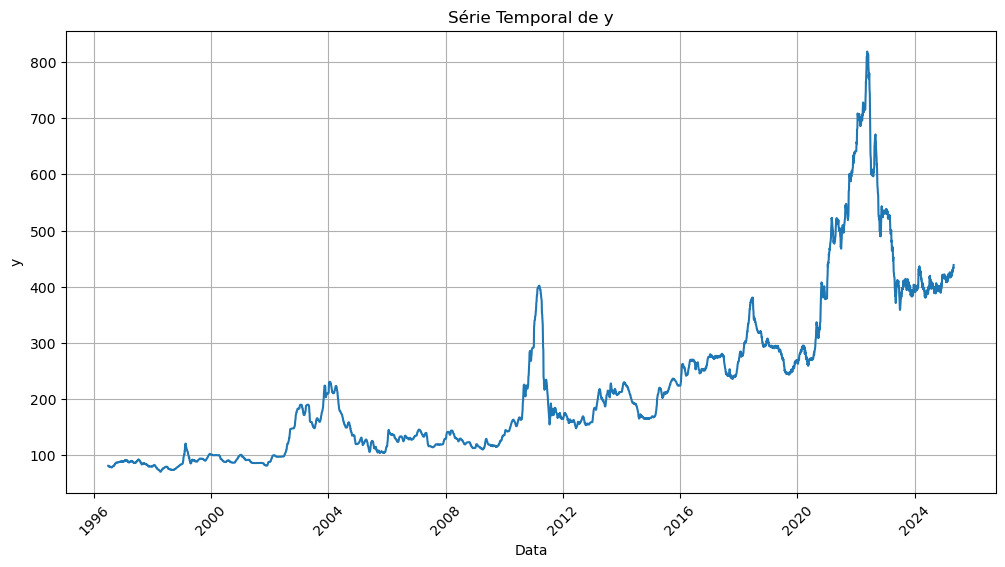

In [24]:
plot_raw_series(df_algodao_brl, "y")

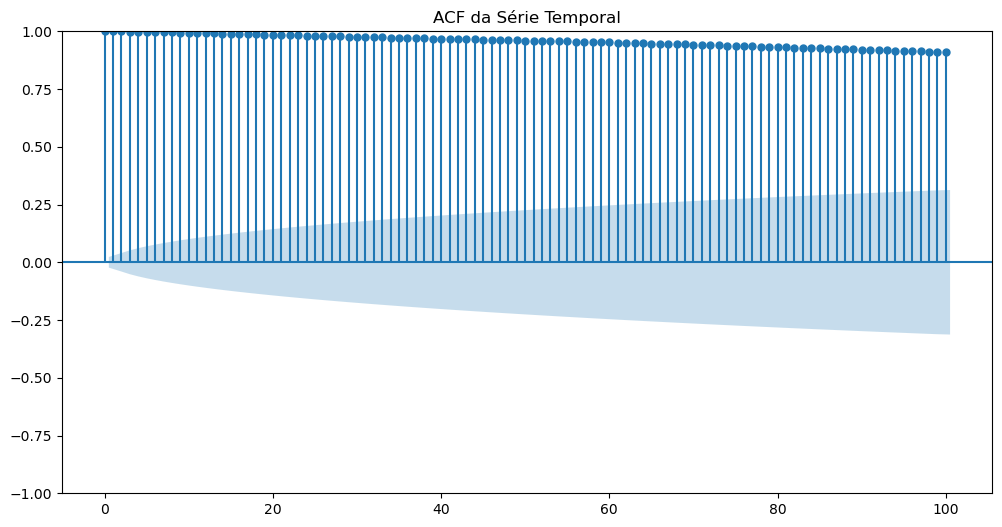

In [25]:
plot_series_acf(df_algodao_brl['y'])

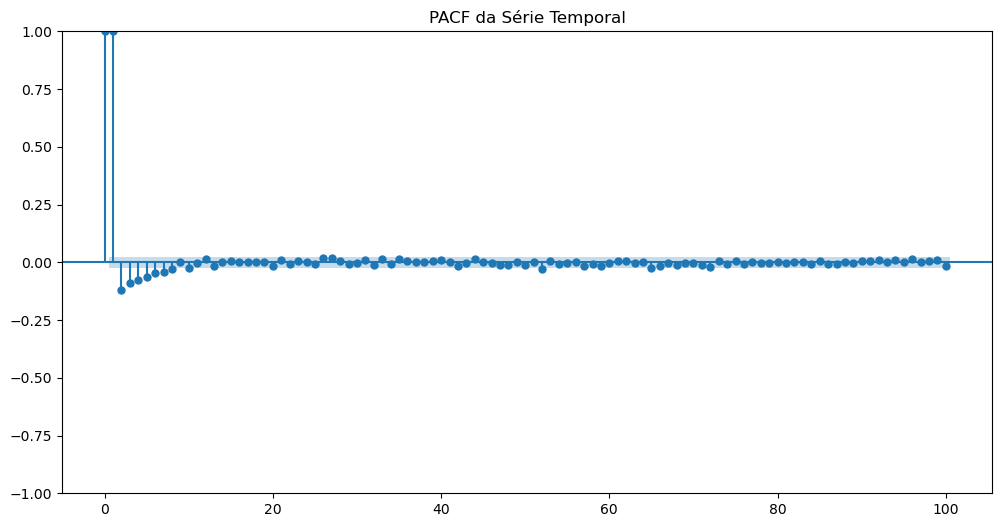

In [26]:
plot_series_pacf(df_algodao_brl['y'])

In [27]:
checks_stationarity(df_algodao_brl['y'])

ADF Statistic: -1.1765972904181987
p-value: 0.6835810916190321
Críticos: {'1%': np.float64(-3.431265172062652), '5%': np.float64(-2.861944433844037), '10%': np.float64(-2.566985276018055)}
❌ Série não é estacionária.


In [28]:
export_to_parquet(df_algodao_brl, "../data/algodao/algodao_brl.parquet")

Arquivo salvo em: ../data/algodao/algodao_brl.parquet
